In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("dataset.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,Players,Agents Played,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage per Round,Kills Per Round,Assists Per Round,...,Headshot %,Clutch Success %,Maximum Kills in a single map,Kills,Deaths,Assists,First Kills,First Deaths,Cluthes Won,Clutches Played
0,k1Ng GEN,Viper Kayo,48,1.36,267.5,1.38,0.83,170.5,0.92,0.48,...,0.34,0.10,23,44,32,23,5,1,1.0,10
1,Shao NAVI,Fade Sage Astra,182,1.29,202.6,1.63,0.87,129.8,0.75,0.35,...,0.37,0.24,23,137,84,64,18,9,9.0,38
2,Leo FNC,Sova Sage Fade,307,1.28,225.0,1.41,0.81,143.2,0.79,0.33,...,0.19,0.27,25,243,172,100,15,7,13.0,49
3,mwzera FUR,Fade Skye Sova,76,1.26,255.3,1.31,0.76,166.0,0.93,0.32,...,0.20,0.22,34,71,54,24,7,5,2.0,9
4,Cloud GIA,Sova,97,1.26,233.4,1.21,0.79,151.7,0.82,0.14,...,0.32,0.14,26,80,66,14,13,5,2.0,14


In [4]:
df["Team"] = [x.split(" ")[1] for x in df["Players"]]

df = df.drop(columns=["Clutch Success %"])
mean_value = df["Cluthes Won"].mean()
df["Cluthes Won"] = df["Cluthes Won"].fillna(value=mean_value)

df.head()

,Players,Agents Played,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage per Round,Kills Per Round,Assists Per Round,...,Headshot %,Maximum Kills in a single map,Kills,Deaths,Assists,First Kills,First Deaths,Cluthes Won,Clutches Played,Team
0,k1Ng GEN,Viper Kayo,48,1.36,267.5,1.38,0.83,170.5,0.92,0.48,...,0.34,23,44,32,23,5,1,1.0,10,GEN
1,Shao NAVI,Fade Sage Astra,182,1.29,202.6,1.63,0.87,129.8,0.75,0.35,...,0.37,23,137,84,64,18,9,9.0,38,NAVI
2,Leo FNC,Sova Sage Fade,307,1.28,225.0,1.41,0.81,143.2,0.79,0.33,...,0.19,25,243,172,100,15,7,13.0,49,FNC
3,mwzera FUR,Fade Skye Sova,76,1.26,255.3,1.31,0.76,166.0,0.93,0.32,...,0.20,34,71,54,24,7,5,2.0,9,FUR
4,Cloud GIA,Sova,97,1.26,233.4,1.21,0.79,151.7,0.82,0.14,...,0.32,26,80,66,14,13,5,2.0,14,GIA


In [5]:
place = [
    ['KOI', 'DFM', 'GEN', 'FPX', 'PRX', 'BBL', 'TH', 'MIBR', 'TL', 'KRÜ', 'ZETA', 'GES', 'RRQ', 'EDG', 'SEN', 'T1', 6],
    ['GIA', 'KC', 'C9', 'EG', 'TS', 'VIT','FUT', 'FUR', 5],
    ['NRG', 'TLN', 'LEV', '100T', 4],
    ['DRX', 'NAVI', 3],
    ['LOUD', 2],
    ['FNC', 1]
]

df["Place"] = df["Team"].apply(lambda x: next((team[-1] for team in place if x in team), None))
df.head()

,Players,Agents Played,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage per Round,Kills Per Round,Assists Per Round,...,Maximum Kills in a single map,Kills,Deaths,Assists,First Kills,First Deaths,Cluthes Won,Clutches Played,Team,Place
0,k1Ng GEN,Viper Kayo,48,1.36,267.5,1.38,0.83,170.5,0.92,0.48,...,23,44,32,23,5,1,1.0,10,GEN,6
1,Shao NAVI,Fade Sage Astra,182,1.29,202.6,1.63,0.87,129.8,0.75,0.35,...,23,137,84,64,18,9,9.0,38,NAVI,3
2,Leo FNC,Sova Sage Fade,307,1.28,225.0,1.41,0.81,143.2,0.79,0.33,...,25,243,172,100,15,7,13.0,49,FNC,1
3,mwzera FUR,Fade Skye Sova,76,1.26,255.3,1.31,0.76,166.0,0.93,0.32,...,34,71,54,24,7,5,2.0,9,FUR,5
4,Cloud GIA,Sova,97,1.26,233.4,1.21,0.79,151.7,0.82,0.14,...,26,80,66,14,13,5,2.0,14,GIA,5


In [6]:
X = df.drop(["Place", "Players", "Agents Played", "Team"], axis=1)
y = df["Place"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = DecisionTreeClassifier()

In [9]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = model.predict(X_test)

accuracy: 0.9696969696969697


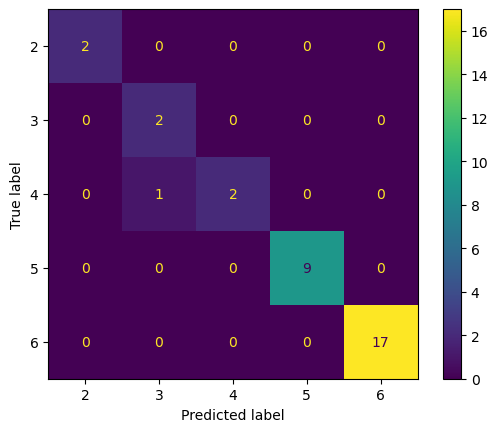

In [11]:
accuracy = accuracy_score(y_test, y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

print(f'accuracy: {accuracy}')
# print(f'confusion_matriz: {cm}')